## Упражнение 7

Решим краевую задачу $-u''(x) + u(x) = x,~~0 \le x \le 1,~~u(0) = u(1) = 0~~~~~~~~(a)$.

Общее решение - это сумма частного решения и общего решения соответствующего однородного уравнения $(u(x) = u_c(x) + u_p(x))$.

Решим однородное уравнение: $−u''(x)+u(x)= 0~~~~~~~~(b)$.

Предполагая, что решение пропорционально $e^{\lambda x}$ для некоторого $\lambda$ и подставляя $e^{\lambda x}$ в (b), получаем два решения: $\lambda = -1$ и $\lambda = 1$. Решение однородного - это сумма всех получившихся решений. Значит, получаем: 
$u_c(x) = c_1 e^{-x} + c_2 e^{x}$.  

Теперь найдём частное решение с помощью метода неопределенных коэффициентов. Частное решение имеющегося неоднородного уравнения имеет вид:
$u_p(x) = a_1 + a_2 x$. Тогда $u''(x) = (a_1 + a_2 x)'' = 0$. Тогда, подставляя в исходное, получаем:

$-0 + a_1 + a_2 x = x$

Сл-но, $a_1 = 0$, $a_2 = 1 \Rightarrow u_p(x) = $.

Итого получаем: $u(x) = u_c(x) + u_p(x) = x + c_1 e^{-x} + c_2 e^{x}$. Подставляя граничные условия u(0) = u(1) = 0 получаем систему, решая которую находим $c_1 = \frac{e}{e^2 - 1}$ и $c_2 = -\frac{e}{e^2 - 1}$. Тогда:

$u(x) = x + \frac{e^{1-x} - e^{1+x}}{e^2 - 1}$.

In [126]:
import numpy as np
import pylab
import math

def func_u(x):
    return x + (math.exp(1 - x) - math.exp(1 + x)) / (math.exp(2) - 1)

### 1) 
Сформируем матрицу $A$. При подстановке $-u''(x) \approx -h^{-2}[u(x_{i-1}) - 2 u(x_{i}) + u(x_{i + 1})]$ получаем
$-h^{-2}[u(x_{i-1}) - 2 u(x_{i}) + u(x_{i + 1})] + u(x_i) = x_i$. Тогда матрица $A$ будет выглядеть так (пример для N = 4):

  \begin{bmatrix}
    2 h^{-2}+1 & -h^{-2} & 0 & 0 \\
    -h^{-2} & 2 h^{-2}+1 & -h^{-2} & 0 \\
    0 & -h^{-2} & 2 h^{-2}+1 & -h^{-2} \\
    0 & 0 & -h^{-2} & 2 h^{-2}+1 \\
  \end{bmatrix}
  
Решим $Au = b$ с помощью стандартной функции.

In [127]:
def matrix_a(N):
    h = 1 / (N + 1)
    a = np.zeros((N, N))
    
    for i in range(0, N):
        if (i - 1 >= 0):
            a[i][i - 1] = - h ** (-2)
            
        a[i][i] = 2 * h ** (-2) + 1  
        
        if (i + 1 < N):
            a[i][i + 1] = - h ** (-2)
            
    return a

def vector_b(N):
    h = 1 / (N + 1)
    b = np.zeros((N))
    for i in range(0, N):
        b[i] = (i + 1) * h
        
    return b
   
def find_solution_standart(N):
    return np.linalg.solve(matrix_a(N), vector_b(N))


Сравним это решение с точным. Построим вектор $u$, элементами которого будут $u(x_i)$, используя функцию, вычисляющую точное значение $u$. 

In [128]:
def find_exact_solution(N):
    h = 1 / (N + 1)
    return np.array([func_u(i * h) for i in range(1, N + 1)])

Построим график погрешности в зависимости от $N$ в логарифмических координатах.

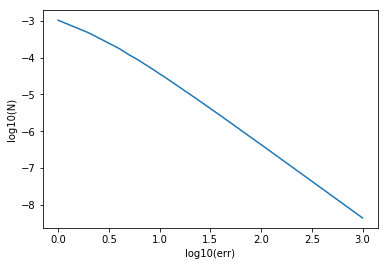

In [129]:
max_N = 1000

ns = [i for i in range(1, max_N + 1)]
log_ns = [np.log10(i) for i in range(1, max_N + 1)]
ys = [np.log10(max(np.abs(find_solution_standart(i) - find_exact_solution(i)))) for i in ns]
pylab.xlabel("log10(err)")
pylab.ylabel("log10(N)")
pylab.plot(log_ns, ys)
pylab.show()


Видим, что в логарифмических координатах функция ошибки линейно зависит от $N$. 

Далее построим график зависимости времени решения СЛАУ от $N$.

In [130]:
import time

def get_time_standart(N):
    start = time.time()
    find_solution_standart(N)
    end = time.time()
    return end - start

time_ys = [np.log10(get_time_standart(i)) for i in ns]
pylab.plot(log_ns, time_ys)
pylab.xlabel("log10(time)")
pylab.ylabel("log10(N)")
pylab.show()

KeyboardInterrupt: 

Далее реализуем метод прогонки.

In [ ]:
def tridiagonal_solver(a, b, c, s):
    N = len(a)
    
    alphas = [b[0] / c[0]]
    betas = [s[0] / c[0]]
    
    for k in range(1, N):
        alphas.append(b[k] / (c[k] - alphas[k - 1] * a[k]))
        betas.append((s[k] + betas[k - 1] * a[k]) / (c[k] - alphas[k - 1] * a[k]))
    
    ts = [betas[N - 1]]
    for k in range(N - 2, -1, -1):
        ts.append(alphas[k] * ts[-1] + betas[k])
    return np.array(ts)[::-1]
    
        
def find_solution_tridiagonal(N):
    h = 1 / (N + 1)
    a = [h ** (-2) for i in range(N)]
    b = [h ** (-2) for i in range(N)]
    c = [2 * h ** (-2) + 1 for i in range(N)]
    s = vector_b(N)
    return tridiagonal_solver(a, b, c, s)

find_solution_tridiagonal(5)

Теперь построим график зависимости времени решения СЛАУ от $N$ для метода прогонки.

In [ ]:
def get_time_tridiagonal(N):
    start = time.time()
    find_solution_tridiagonal(N)
    end = time.time()
    return end - start

time_ys2 = [np.log10(get_time_tridiagonal(i)) for i in ns]
pylab.plot(log_ns, time_ys2)
pylab.xlabel("log10(time)")
pylab.ylabel("log10(N)")
pylab.show()

Сравним графики, получившиеся при рассмотрении времени работы двух методов:


In [ ]:
pylab.plot(log_ns, time_ys, label="standart function")
pylab.plot(log_ns, time_ys2, label="tridiagonal")
pylab.legend()
pylab.show()

Как видно, метод прогонки работает быстрее. 

## Упражнение 8

In [131]:
it_num = 300

def sum1(a, xb, i):
    summ = 0
    for j in range(i):
        summ += a[i][j] * xb[j]
    return summ

def sum2(a, xa, i, N):
    summ = 0
    for j in range(i + 1, N):
        summ += a[i][j] * xa[j]
    return summ    

def SOR(a, b, w):
    N = len(a)
    xa = np.zeros((N))
    x_res = np.array([xa])
    
    for i in range(0, it_num):
        xb = np.zeros((N))
        for i in range(N):
            xb[i] = (1 - w) * xa[i] + w / a[i][i] * (b[i] - sum1(a, xb, i) - sum2(a, xa, i, N))
        x_res = np.append(x_res, [np.copy(xb)], axis=0)
        xa = np.copy(xb)
        
    return x_res

def find_solution_sor(N):
    return SOR(matrix_a(N), vector_b(N), 0.5)[-1]

Построим требуемые графики погрешности. Сначала для нескольких значений $N$.

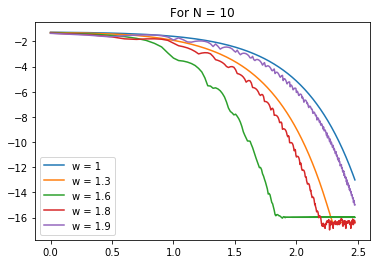

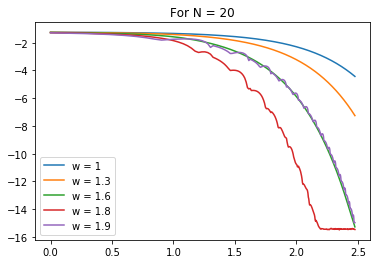

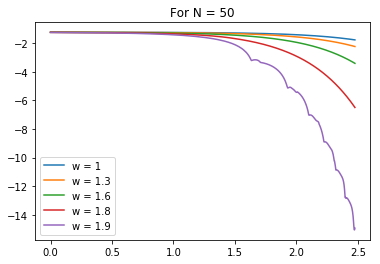

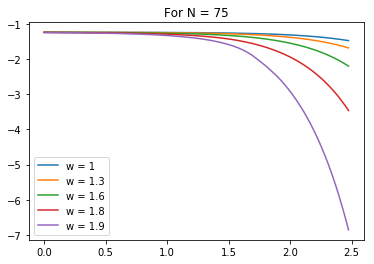

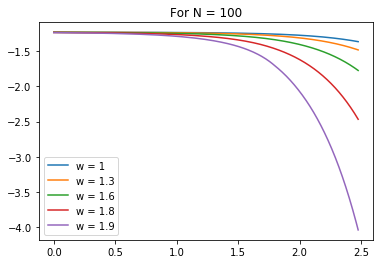

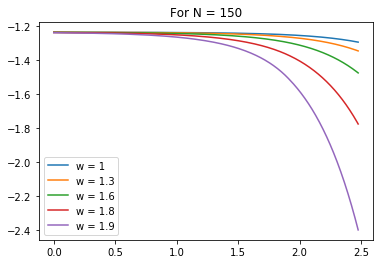

In [132]:
def build_chart(N):
    ws = [1, 1.3, 1.6, 1.8, 1.9]
    its = range(1, it_num)
    log_its = [np.log10(i) for i in its]
    
    for w in ws:
        x_res = SOR(matrix_a(N), vector_b(N), w)
        log_err = [np.log10(max(np.abs(x_res[i] - find_solution_tridiagonal(N)))) for i in its]
        pylab.plot(log_its, log_err, label="w = " + str(w))
    pylab.title("For N = " + str(N))
    pylab.legend()
    pylab.show()
    
    
Ns = [10, 20, 50, 75, 100, 150]

for i in Ns:
    build_chart(i)

Как видно из графиков, для разных $N$ наилучшая сходимость достигается для разных $\omega$. Но при больших $N$ стоит выбирать $\omega = 1.9$.

Для оценки скорости сходимости построим графики, в которых шкала OY в логарифмических координатах.

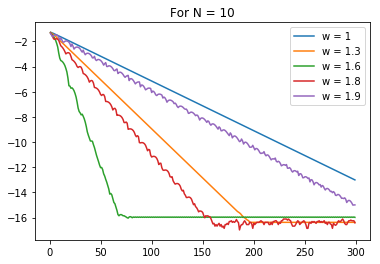

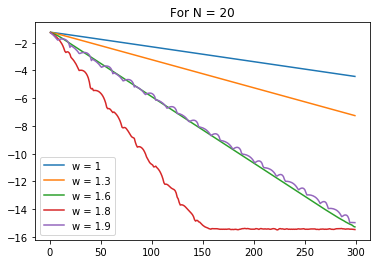

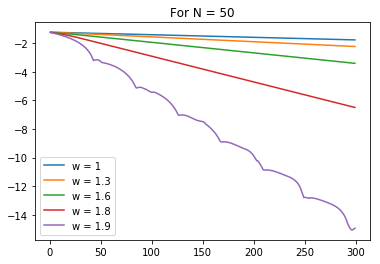

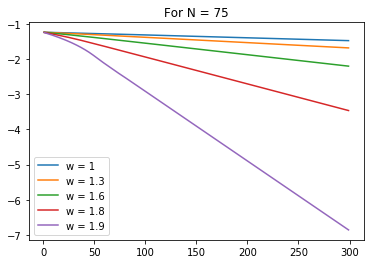

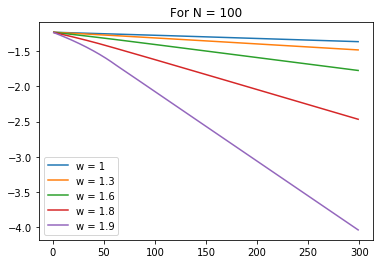

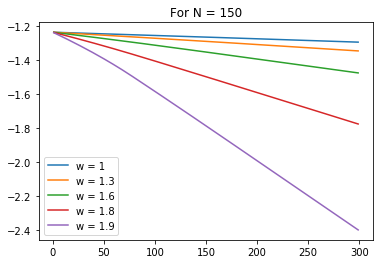

In [133]:
def build_chart(N):
    ws = [1, 1.3, 1.6, 1.8, 1.9]
    its = range(1, it_num)
    
    for w in ws:
        x_res = SOR(matrix_a(N), vector_b(N), w)
        log_err = [np.log10(max(np.abs(x_res[i] - find_solution_tridiagonal(N)))) for i in its]
        pylab.plot(its, log_err, label="w = " + str(w))
    pylab.title("For N = " + str(N))
    pylab.legend()
    pylab.show()
    
    
Ns = [10, 20, 50, 75, 100, 150]

for i in Ns:
    build_chart(i)

Видим, что в логарифмических координатах функция ошибки линейно зависит от кол-ва итераций. Сл-но, сходимость экспоненциальная. 